In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train,x_valid=x_train[:50000],x_train[50000:]
y_train,y_valid=y_train[:50000],y_train[50000:]

In [4]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [6]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [7]:
# log_dir='./callbacks'
log_dir=os.path.join('callbacks')
if not os.path.exists(log_dir):
    os.mkdir(log_dir)
output_model_file=os.path.join(log_dir,'my_model.h5')

In [8]:
callbacks=[
    tf.keras.callbacks.TensorBoard(log_dir),
    tf.keras.callbacks.ModelCheckpoint(output_model_file,best_model_only=True),
    tf.keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

In [9]:
history=model.fit(x_train,y_train,validation_data=[x_valid,y_valid],epochs=10,callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 63us/sample - loss: 0.5426 - accuracy: 0.8094 - val_loss: 0.4598 - val_accuracy: 0.8310
Epoch 2/10
50000/50000 [==============================] - 3s 56us/sample - loss: 0.3960 - accuracy: 0.8590 - val_loss: 0.4104 - val_accuracy: 0.8501
Epoch 3/10
50000/50000 [==============================] - 3s 54us/sample - loss: 0.3574 - accuracy: 0.8711 - val_loss: 0.3749 - val_accuracy: 0.8663
Epoch 4/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.3314 - accuracy: 0.8819 - val_loss: 0.3461 - val_accuracy: 0.8759
Epoch 5/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.3119 - accuracy: 0.8875 - val_loss: 0.3425 - val_accuracy: 0.8782
Epoch 6/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2949 - accuracy: 0.8927 - val_loss: 0.3392 - val_accuracy: 0.8745
Epoch 7/10
50000/50000 [==============================] 

In [12]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

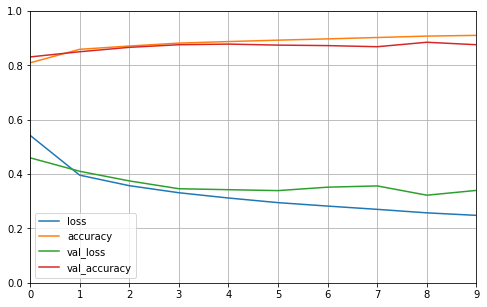

In [13]:
plot_learning_curve(history)

In [14]:
#tensorboard --logdir=callbacks

In [16]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.35760304005146026, 0.8691]